In this Kaggle notebook, we will delve into a comparative analysis of Adidas and Nike, two titans in the global sportswear market. Our objective is to understand which brand is more discount-friendly, which has a broader product range, how many products they share, and which of their products are highest rated by consumers.

We will leverage a dataset that provides detailed information on the products offered by both brands, including pricing, product types, and customer reviews. Through exploratory data analysis (EDA), we will scrutinize the data to answer the following key questions:

    Discount Analysis: How do Adidas and Nike compare in terms of their discount strategies? Which brand offers more significant discounts?
    Product Range: Which brand has a wider variety of products? How does the diversity of their product lineup compare?
    Common Products: How many products are common to both Adidas and Nike? This will help us understand the overlap in their offerings.
    Highest Rated Products: By analyzing customer reviews, we will identify the top-rated products from each brand. This will give us insights into the preferences of consumers and the strengths of each brand.

By the end of this notebook, we aim to provide a comprehensive comparison that can inform strategic decisions for both consumers and stakeholders interested in the sportswear industry.


In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adidas-vs-nike/Adidas Vs Nike.csv


In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


These imports are essential tools for data analysis and visualization in Python:

numpy (aliased as np) is used for numerical computations and operations on arrays.
pandas (aliased as pd) is a library for data manipulation and analysis, providing data structures for handling datasets.
matplotlib.pyplot (aliased as plt) is a plotting library for creating static, animated, and interactive visualizations.
seaborn (aliased as sns) is a statistical data visualization library based on matplotlib, providing a high-level interface for creating informative graphics.

In [22]:
NikeAdidas = pd.read_csv('/kaggle/input/adidas-vs-nike/Adidas Vs Nike.csv')


This line of code reads a CSV file named 'Adidas Vs Nike.csv' from the specified Kaggle input directory and loads it into a pandas DataFrame named NikeAdidas.

In [23]:
NikeAdidas.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [24]:
NikeAdidas = NikeAdidas.drop(columns=['Product ID'], axis=1)

In [25]:
NikeAdidas['Last Visited'] = pd.to_datetime(NikeAdidas['Last Visited'])

This line of code converts the 'Last Visited' column in the NikeAdidas DataFrame to a datetime format.

In [26]:
NikeAdidas

,Product Name,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15
4,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15
...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13 15:41:01
3264,Nike Phantom Venom Club IC,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13 15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13 15:41:07
3266,Nike Air Max 98,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19


In [27]:
# Create a boolean mask for rows where Listing Price is 0
price_zero_mask = NikeAdidas['Listing Price'] == 0

# Update the Listing Price with Sale Price where Listing Price was 0
NikeAdidas.loc[price_zero_mask, 'Listing Price'] = NikeAdidas.loc[price_zero_mask, 'Sale Price']

# Display the updated DataFrame
print(NikeAdidas)


                                           Product Name  Listing Price  \
0     Women's adidas Originals NMD_Racer Primeknit S...          14999   
1                  Women's adidas Originals Sleek Shoes           7599   
2                     Women's adidas Swim Puka Slippers            999   
3      Women's adidas Sport Inspired Questar Ride Shoes           6999   
4              Women's adidas Originals Taekwondo Shoes           7999   
...                                                 ...            ...   
3263                                 Air Jordan 8 Retro          15995   
3264                         Nike Phantom Venom Club IC           4995   
3265               Nike Mercurial Superfly 7 Academy TF           8495   
3266                                    Nike Air Max 98          16995   
3267                                     Nike P-6000 SE           8995   

      Sale Price  Discount                    Brand  \
0           7499        50  Adidas Adidas ORIGINALS   
1

Creates a boolean mask (price_zero_mask) that is True for each row in the NikeAdidas DataFrame where the 'Listing Price' is 0.
Uses this mask to update the 'Listing Price' column, replacing the value with the 'Sale Price' where the mask is True.
This operation is a common way to handle missing or zero values in a dataset, by replacing them with other available values, in this case, the sale price.

In [28]:
NikeAdidas.Brand.unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [29]:
NikeAdidas['Brand']= NikeAdidas['Brand'].replace('Adidas Adidas ORIGINALS','Adidas ORIGINALS')
NikeAdidas.Brand.unique()

array(['Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

NikeAdidas['Brand']= NikeAdidas['Brand'].replace('Adidas Adidas ORIGINALS','Adidas ORIGINALS'): This line uses the replace method to change the brand name 'Adidas Adidas ORIGINALS' to 'Adidas ORIGINALS' in the 'Brand' column of the NikeAdidas DataFrame. This is a common operation to clean up data and ensure consistency in the way brand names are represented.

NikeAdidas.Brand.unique(): This line retrieves all unique values in the 'Brand' column of the NikeAdidas DataFrame. This is useful for understanding the different brands present in the dataset, which can be important for further analysis or for verifying that the data cleaning steps have been applied correctly

In [30]:
GroupedByBrands=NikeAdidas.groupby('Brand')
Nike = GroupedByBrands.get_group('Nike')
AdidasOriginals = GroupedByBrands.get_group('Adidas ORIGINALS')
AdidasNeo = GroupedByBrands.get_group('Adidas CORE / NEO')
AdidasSports = GroupedByBrands.get_group('Adidas SPORT PERFORMANCE')

# Combine the Adidas groups into one DataFrame
AdidasFrames = [AdidasOriginals, AdidasNeo, AdidasSports]
Adidas = pd.concat(AdidasFrames)
Adidas.reset_index(inplace=True, drop=True)

GroupedByBrands=NikeAdidas.groupby('Brand'): It groups the NikeAdidas DataFrame by the 'Brand' column, creating a GroupBy object for further operations.

Nike = GroupedByBrands.get_group('Nike'): It retrieves the subset of the DataFrame for the 'Nike' brand.

AdidasOriginals = GroupedByBrands.get_group('Adidas ORIGINALS'): It retrieves the subset for the 'Adidas ORIGINALS' brand.

AdidasNeo = GroupedByBrands.get_group('Adidas CORE / NEO'): It retrieves the subset for the 'Adidas CORE / NEO' brand.

AdidasSports = GroupedByBrands.get_group('Adidas SPORT PERFORMANCE'): It retrieves the subset for the 'Adidas SPORT PERFORMANCE' brand.

AdidasFrames = [AdidasOriginals, AdidasNeo, AdidasSports]: It creates a list of DataFrames containing the Adidas subsets.

Adidas = pd.concat(AdidasFrames): It concatenates these DataFrames into a single DataFrame, Adidas, which contains all the rows from the individual Adidas subsets.

Adidas.reset_index(inplace=True, drop=True): It resets the index of the Adidas DataFrame, dropping the old index, and does so in place without creating a new DataFrame.

The output is a DataFrame Adidas that combines all the Adidas-branded products from the original NikeAdidas DataFrame into a single DataFrame, with a reset index.

Text(0.5, 1.0, 'Discounts offered by Brands')

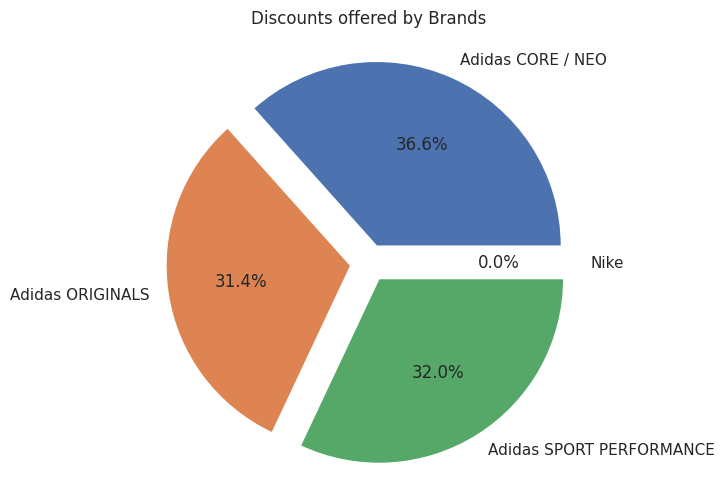

In [31]:
GroupedByBrands = NikeAdidas.groupby('Brand')['Discount']
AvgDis = GroupedByBrands.mean()
plt.figure(figsize=(10,6))
plt.pie(AvgDis.values, autopct="%.1f%%", explode=[0.10]*4, labels=AvgDis.index)
plt.title('Discounts offered by Brands')

Based on the pie chart, Adidas seems to be the better brand in terms of offering discounts to its customers. Offering discounts is a strategy that can increase sales and customer loyalty, as it provides an incentive for consumers to purchase products. While Nike does not offer any discounts, this could potentially limit its market reach or sales volume. However, it's important to consider other factors such as product quality, brand reputation, and customer service when determining the overall best brand.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Products offered By Brands')

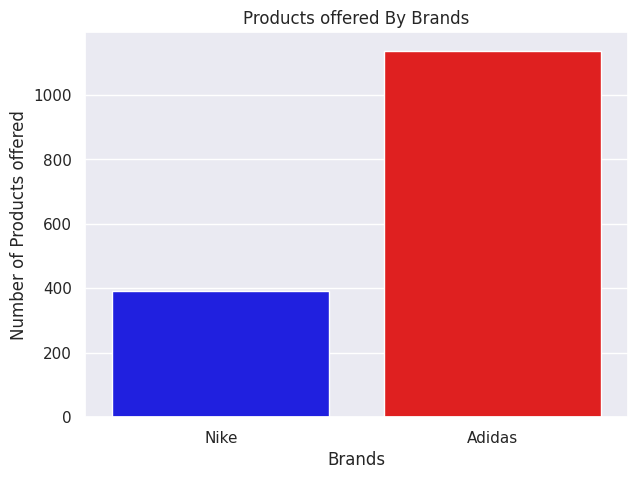

In [32]:
# Count the number of products for Nike and Adidas
ProductsCount = {
    'Nike': Nike['Product Name'].value_counts().count(),
    'Adidas': Adidas['Product Name'].value_counts().count()
}

# Create a bar plot for the number of products
sns.set(rc={'figure.figsize':(7,5)})
palette = ["blue" if brand == "Nike" else "red" for brand in ProductsCount.keys()]
sns.barplot(x=list(ProductsCount.keys()), y=list(ProductsCount.values()), palette=palette)
plt.xlabel('Brands')
plt.ylabel('Number of Products offered')
plt.title('Products offered By Brands')

Based on the bar graph data, Adidas offers a significantly larger product range than Nike, with over 1000 products compared to Nike's 400 products. This could suggest that Adidas may have a broader appeal and market presence, potentially reaching a wider consumer base. However, it's important to consider other factors such as the quality and popularity of each product, as well as the brand's marketing and customer service strategies, to determine which brand is "better" overall.

Text(0.5, 1.0, 'Common Adidas Products Manufactured')

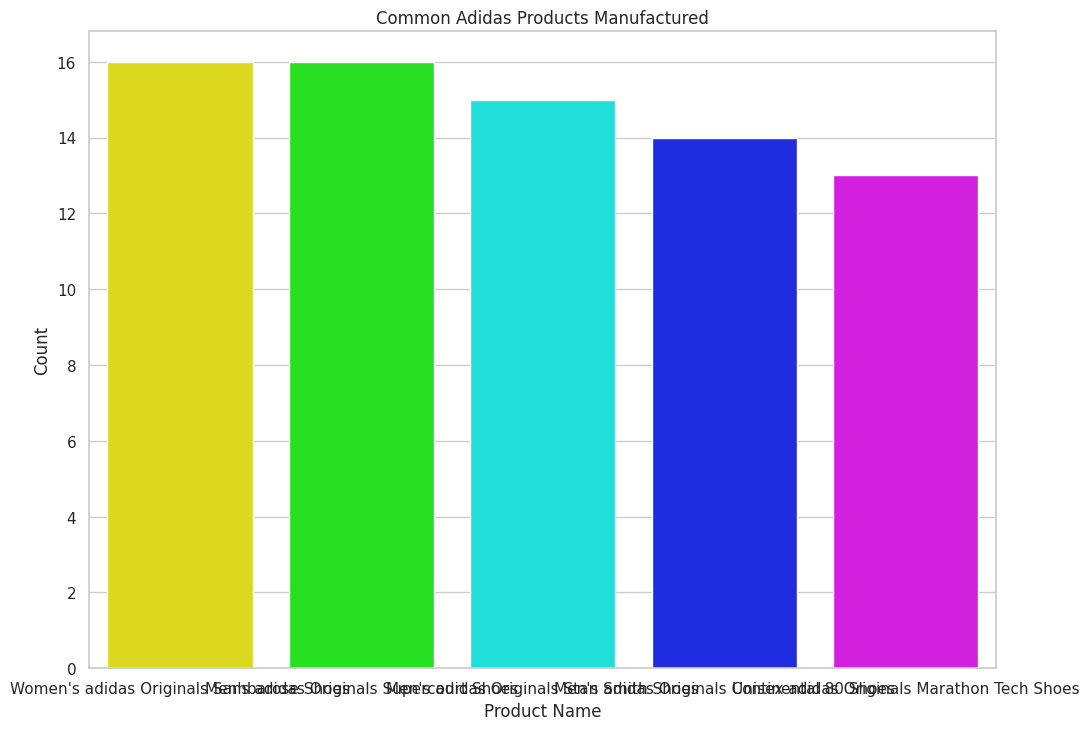

In [33]:
# Create a bar plot for the most common Adidas products
AdidasTopProducts = Adidas['Product Name'].value_counts().head()
colors = sns.color_palette("hsv", len(AdidasTopProducts))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style='whitegrid')
sns.barplot(x=AdidasTopProducts.index, y=AdidasTopProducts, palette=colors)
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Common Adidas Products Manufactured')

Text(0.5, 1.0, 'Common Nike Products Manufactured')

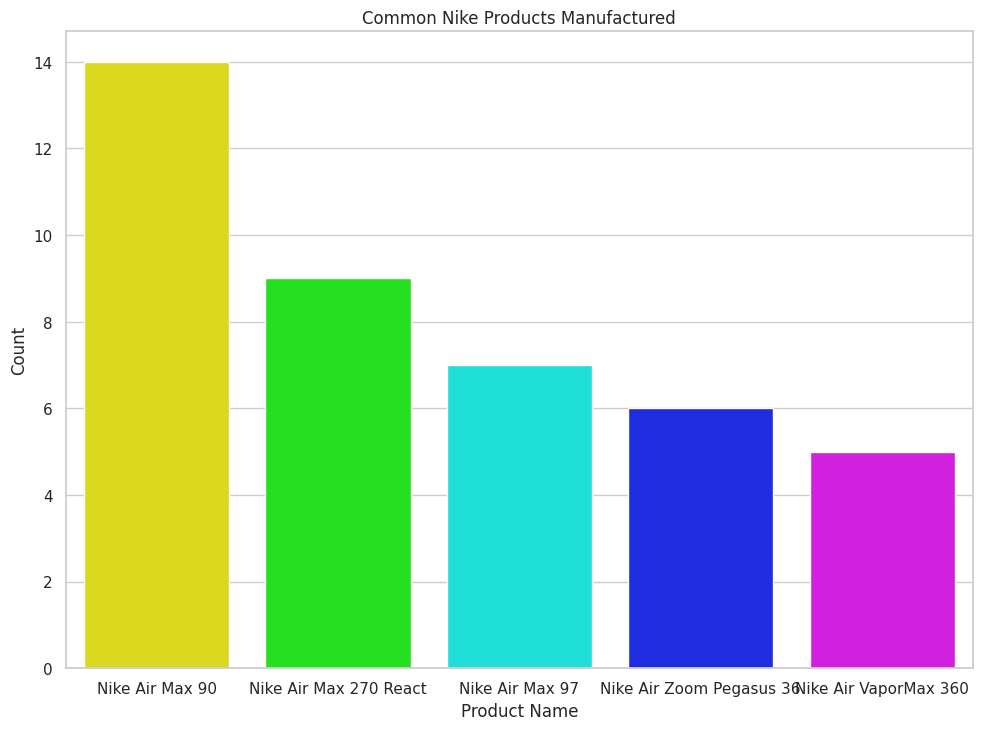

In [34]:
# Create a bar plot for the most common Nike products
NikeTopProducts = Nike['Product Name'].value_counts().head()
colors = sns.color_palette("hsv", len(NikeTopProducts))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style='whitegrid')
sns.barplot(x=NikeTopProducts.index, y=NikeTopProducts, palette=colors)
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Common Nike Products Manufactured')

In [35]:
# Print descriptive statistics for Rating and Reviews for both Nike and Adidas
print("\nDescriptive Statistics for Nike:\n")
print(Nike[['Rating', 'Reviews']].describe())
print("\nDescriptive Statistics for Adidas:\n")
print(Adidas[['Rating', 'Reviews']].describe())


Descriptive Statistics for Nike:

           Rating     Reviews
count  643.000000  643.000000
mean     2.734837    7.181960
std      2.137756   15.968315
min      0.000000    0.000000
25%      0.000000    0.000000
50%      3.800000    1.000000
75%      4.600000    6.000000
max      5.000000  223.000000

Descriptive Statistics for Adidas:

            Rating      Reviews
count  2625.000000  2625.000000
mean      3.366362    48.725714
std       1.159873    28.926042
min       0.000000     0.000000
25%       2.700000    24.000000
50%       3.500000    49.000000
75%       4.300000    74.000000
max       5.000000    99.000000


In [36]:
HighestRatedProductNike = Nike[Nike.Rating == Nike.Rating.max()]['Product Name']
HighestRatedProductAdidas = Adidas[Adidas.Rating == Adidas.Rating.max()]['Product Name']

In [37]:
# Print the names of the highest rated products in Nike
print("\nHighest Rated Product for Nike:\n")
for product in HighestRatedProductNike:
    print(product)


Highest Rated Product for Nike:

Nike Free Metcon 3
Nike Air Max 270 React ENG
Nike Air Max 90
Air Jordan XXXIV PF
LeBron 7 QS
Nike Air Force 1 '07 LV8
Jordan 'Why Not?' Zer0.3 PF
Nike Metcon 5 AMP
Nike Air Max 97
Nike Renew Fusion
Nike Air Max 90 Premium
Nike Epic Phantom React A.I.R. Cody Hudson
Nike Air Max 90
Nike Air Max 270 React ENG
Nike Free Metcon 3
Nike ISPA Joyride Envelope
Nike Mercurial Superfly 7 Academy MG
Nike Daybreak SP
Kyrie 5 x Bandulu
Nike Air Max Impact
Nike Air Max 90 QS
Nike Air Force 1 '07 LV8
Nike Air Max 90
Nike x Carhartt WIP Air Max 95
Nike Air Zoom Winflo 6
Nike Air Max 97
Nike Air Force 1 '07 LV8
Nike Air Max Verona
Nike Air Max Plus III
Nike Metcon 5 AMP
Nike React Kenny 55
Nike Phantom Vision Club Dynamic Fit FG
Nike Mercurial Superfly 7 Academy IC
Nike Zoom Rival Fly
Jordan Aerospace 720
Nike Air Max Plus III
Nike Air Max 90
Nike Air Zoom Terra Kiger 6
Nike Air Max 97 Utility
Jordan Jumpman 2020 PF
Air Jordan XXXIV PF
Nike React Sertu
Nike React Eleme

In [38]:
# Print the names of the highest rated products in Adidas
print("\nHighest Rated Product for Adidas:\n")
for product in HighestRatedProductAdidas:
    print(product)


Highest Rated Product for Adidas:

Women's ADIDAS ORIGINALS NMD_CS2 PK SHOES
Women's adidas Originals Forest Grove Shoes
Women's adidas Originals SL Andridge Shoes
Women's adidas Originals Falcon Shoes
Women's adidas Originals Deerupt Runner Shoes
WOMEN'S ADIDAS ORIGINALS ARKYN PRIMEKNIT SHOES
WOMEN'S ADIDAS ORIGINALS FLB_RUNNER SHOES
Women's ADIDAS ORIGINALS COURTVANTAGE VULCANIZED SHOES
Women's adidas Originals U_Path Run Shoes
Unisex adidas Originals Continental Vulc Shoes
WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES
Women's adidas Originals Supercourt RX Shoes
Men's adidas Originals Superstar MG Shoes
Men's adidas Originals Rivalry Low Shoes
Men's adidas Originals Liberty Cup Shoes
Men's adidas Originals Supercourt Shoes
MEN'S ADIDAS ORIGINALS GAZELLE SHOES
Men's adidas Originals A.R. Trainer Shoes
Men's adidas Originals Lxcon Shoes
Men's adidas Originals Stan Smith Gore-Tex Shoes
Men's adidas Originals Liberty Cup Shoes
Women's adidas Running Duramo 9 Shoes
Women's adidas Sport Inspi

Based on the data and analysis conducted in this Kaggle notebook, Adidas appears to have a broader product range with over 1000 products compared to Nike's 400 products. This suggests that Adidas may have a more extensive market presence and a wider appeal to consumers. However, it's important to note that product range is just one aspect of a brand's performance and does not necessarily translate to market dominance or consumer satisfaction.

Adidas' larger product range could indicate a more diversified offering, which may attract a wider customer base. However, the analysis also revealed that all Adidas products were offering some form of discount, while Nike did not offer any. This could be seen as a strategic advantage for Adidas in terms of pricing, which may influence consumer purchasing decisions.

In conclusion, while Adidas seems to have a larger product range and offers discounts, the overall brand performance should be evaluated based on additional factors such as product quality, customer satisfaction, and marketing strategies. Both brands have their strengths and areas for improvement, and the choice between them would depend on individual consumer preferences and brand loyalty.